In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
identidad=test_df['Id']
test_df=test_df.drop('Id', axis=1)
train_df=train_df.drop('Id', axis=1)


In [7]:
X_train=train_df.drop('SalePrice', axis=1)
y_train= train_df['SalePrice']

In [8]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [9]:
test_df.shape

(1459, 79)

In [10]:
X_train= X_train.loc[:, X_train.isnull().mean()<.2]

In [11]:
columnas=X_train.columns.tolist()

In [12]:
X_test=test_df[columnas]

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [14]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [15]:
X_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [16]:
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 150)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

In [17]:
unique_category = []
for i in X_train.columns:
    if X_train[i].unique().shape[0] <= 3:
        unique_category.append(i)
        print(i, X_train[i].unique(), "\n")

Street ['Pave' 'Grvl'] 

Utilities ['AllPub' 'NoSeWa'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

CentralAir ['Y' 'N'] 

BsmtHalfBath [0 1 2] 

HalfBath [1 0 2] 

PavedDrive ['Y' 'N' 'P'] 



In [18]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [20]:
 mylist = list(X_train.select_dtypes(include=['object']).columns)

In [21]:
num=list(X_train.select_dtypes(include=['int64','float64' ]).columns)

In [22]:
num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [23]:
mylist 

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,468.0000,LwQ,144.0000,270.0000,882.0000,GasA,TA,Y,SBrkr,896,0,0,896,0.0000,0.0000,1,0,2,1,TA,5,Typ,0,Attchd,1961.0000,Unf,1.0000,730.0000,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0000,TA,TA,CBlock,TA,TA,No,ALQ,923.0000,Unf,0.0000,406.0000,1329.0000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0000,0.0000,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0000,Unf,1.0000,312.0000,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,PConc,Gd,TA,No,GLQ,791.0000,Unf,0.0000,137.0000,928.0000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0000,0.0000,2,1,3,1,TA,6,Typ,1,Attchd,1997.0000,Fin,2.0000,482.0000,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0000,TA,TA,PConc,TA,TA,No,GLQ,602.0000,Unf,0.0000,324.0000,926.0000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0000,0.0000,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0000,Fin,2.0000,470.0000,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0000,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0000,Gd,TA,PConc,Gd,TA,No,ALQ,263.0000,Unf,0.0000,1017.0000,1280.0000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0000,0.0000,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0000,RFn,2.0000,506.0000,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0000,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0000,TA,TA,CBlock,TA,TA,No,Unf,0.0000,Unf,0.0000,546.0000,546.0000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0000,0.0000,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0000,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,252.0000,Unf,0.0000,294.0000,546.0000,GasA,TA,Y,SBrkr,546,546,0,1092,0.0000,0.0000,1,1,3,1,TA,6,Typ,0,CarPort,1970.0000,Unf,1.0000,286.0000,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0000,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,ALQ,1224.0000,Unf,0.0000,0.0000,1224.0000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0000,0.0000,1,0,4,1,TA,7,Typ,1,Detchd,1960.0000,Unf,2.0000,576.0000,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Sh

In [25]:
unique_category = []
for i in X_train.columns:
    if X_train[i].unique().shape[0] <= 10:
        unique_category.append(i)
        print(i, X_train[i].unique(), "\n")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street ['Pave' 'Grvl'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities ['AllPub' 'NoSeWa'] 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual [ 7  6  8  5  9  4 10  3  1  2] 

OverallCond [5 8 6 7 4 2 3 9 1] 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan] 

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 

BsmtQual ['Gd' 'TA' 'E

In [26]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1201.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1452.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1379.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,56.8973,70.0500,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.6853,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5062,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158
std,42.3006,24.2848,9981.2649,1.3830,1.1128,30.2029,20.6454,181.0662,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,24.6897,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281
min,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000
25%,20.0000,59.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1961.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000
50%,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000
75%,70.0000,80.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,166.0000,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2002.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000
max,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000


In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

imputer.fit(X_train[num])

X_train[num] = imputer.transform(X_train[num])

X_test[num] = imputer.transform(X_test[num])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [28]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,56.8973,69.8637,10516.8281,6.0993,5.5753,1971.2678,1984.8658,103.1171,443.6397,46.5493,567.2404,1057.4295,1162.6267,346.9925,5.8445,1515.4637,0.4253,0.0575,1.5651,0.3829,2.8664,1.0466,6.5178,0.6130,1978.5890,1.7671,472.9801,94.2445,46.6603,21.9541,3.4096,15.0610,2.7589,43.4890,6.3219,2007.8158
std,42.3006,22.0277,9981.2649,1.3830,1.1128,30.2029,20.6454,180.7314,456.0981,161.3193,441.8670,438.7053,386.5877,436.5284,48.6231,525.4804,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,1.6254,0.6447,23.9970,0.7473,213.8048,125.3388,66.2560,61.1191,29.3173,55.7574,40.1773,496.1230,2.7036,1.3281
min,20.0000,21.0000,1300.0000,1.0000,1.0000,1872.0000,1950.0000,0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1900.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2006.0000
25%,20.0000,60.0000,7553.5000,5.0000,5.0000,1954.0000,1967.0000,0.0000,0.0000,0.0000,223.0000,795.7500,882.0000,0.0000,0.0000,1129.5000,0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,1962.0000,1.0000,334.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,2007.0000
50%,50.0000,69.0000,9478.5000,6.0000,5.0000,1973.0000,1994.0000,0.0000,383.5000,0.0000,477.5000,991.5000,1087.0000,0.0000,0.0000,1464.0000,0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,1980.0000,2.0000,480.0000,0.0000,25.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2008.0000
75%,70.0000,79.0000,11601.5000,7.0000,6.0000,2000.0000,2004.0000,164.2500,712.2500,0.0000,808.0000,1298.2500,1391.2500,728.0000,0.0000,1776.7500,1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,2001.0000,2.0000,576.0000,168.0000,68.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,2009.0000
max,190.0000,313.0000,215245.0000,10.0000,9.0000,2010.0000,2010.0000,1600.0000,5644.0000,1474.0000,2336.0000,6110.0000,4692.0000,2065.0000,572.0000,5642.0000,3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,2010.0000,4.0000,1418.0000,857.0000,547.0000,552.0000,508.0000,480.0000,738.0000,15500.0000,12.0000,2010.0000


In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

imputer.fit(X_train[mylist])

X_train[mylist] = imputer.transform(X_train[mylist])

X_test[mylist] = imputer.transform(X_test[mylist])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

In [32]:
mylist

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

LOOE_encoder = LeaveOneOutEncoder()
train_looe = LOOE_encoder.fit_transform(X_train[mylist], y_train)
test_looe = LOOE_encoder.transform(X_test[mylist])

In [34]:
train_looe 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,190989.7817,181111.7020,164707.4751,180162.1313,180932.0617,176908.0171,179936.1311,197895.0738,184476.4257,181150.4785,185745.1559,210055.2590,171451.4860,179783.6539,213743.0817,214444.2545,204683.2950,231681.0123,184015.7978,225256.3406,202679.0600,181472.1774,163393.7323,235478.2614,182491.2514,182002.6398,214923.0973,186170.3512,186794.3786,212122.2051,183410.6990,194396.6432,202053.5938,182573.2387,182999.0647,186417.4944,173374.1130,175174.4018
1,191013.2600,181130.2842,164736.6959,180182.7420,180950.5802,177857.0652,179955.6821,244500.0000,141987.6750,181169.1766,185767.3052,175977.8717,171475.1702,179802.4955,149275.7032,149654.3615,156930.0666,144300.2541,184036.8751,149755.6445,202722.8201,181492.2220,258262.6617,161482.0776,182512.1330,182021.5606,214959.5838,186190.1459,186814.6184,139905.9210,183430.5666,194425.0642,202117.7268,182592.6492,183018.2681,186437.6587,173395.4400,175196.9582
2,190976.7383,181101.3785,206065.6439,180150.6809,180921.7737,176893.7450,179925.2694,197794.4027,184464.5115,181140.0907,185732.8507,210021.4752,171438.3281,179773.1863,213713.8988,214414.4334,204649.5113,231650.2115,184004.0882,225233.1207,202654.7488,181461.0416,192517.8850,235442.2902,182479.6504,181992.1282,214902.8270,186159.3541,186783.1342,212096.5641,183399.6615,194380.8537,202017.9644,182562.4551,182988.3962,186406.2920,173362.2646,175161.8705
3,191049.3470,181158.8458,206238.5217,180214.4214,180979.0439,181782.2939,179985.7328,212037.2200,184530.8340,181197.9162,185801.3495,210209.5383,171511.5737,179831.4557,149889.6537,161905.4054,156977.7130,144346.1105,184069.2717,132237.9103,138864.6409,214749.9062,163462.9242,161671.5753,182544.2289,182050.6426,156929.1167,186220.5711,186845.7279,212239.2991,183461.1038,134075.8549,137566.9139,182622.4838,183047.7845,186468.6520,173428.2204,146591.8900
4,190953.6948,181083.1404,206010.7785,180130.4519,180903.5981,176367.9348,179906.0804,337427.7000,184443.4631,181121.7389,185711.1116,209961.7905,171415.0825,179754.6936,213662.3424,214361.7495,204589.8266,231595.7967,183983.4012,225192.0991,202611.7990,181441.3682,206446.3455,235378.7410,182459.1555,181973.5578,214867.0162,186139.9260,186763.2691,212051.2650,183380.1619,194352.9589,201955.0190,182543.4040,182969.5484,186386.5011,173341.3325,175139.7318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,191018.9122,181134.7577,164743.7305,180187.7038,180955.0384,176939.8915,179960.3888,193083.4103,184503.0342,181173.6780,185772.6374,210130.7095,171480.8719,179807.0314,213808.2568,214510.8549,156937.5293,144307.4365,184041.9493,225308.1981,202733.3549,181497.0475,163427.5707,165498.9378,182517.1601,182026.1156,214968.3676,186194.9113,186819.4910,139914.7766,183435.3495,194431.9063,202133.1663,182597.3221,183022.8912,186442.5131,173400.5742,175202.3885
1456,190988.4774,181110.6696,164705.8517,180160.9863,180931.0329,176906.5899,179935.0449,188759.0972,184475.2343,181149.4398,185743.9253,175938.5614,171450.1702,179782.6071,175624.0841,167815.3121,266021.2913,144268.7624,184014.6269,149710.6209,202676.6288,181471.0638,163392.2172,161351.9406,164066.5094,182001.5886,142204.4754,186169.2515,186793.2541,139867.0926,144265.0000,194395.0642,137464.7241,182572.1603,182997.9979,186416.3742,173372.9281,175173.1487
1457,190939.3470,181071.7846,164644.7045,180117.8565,180892.2812,176852.8316,179894.1325,209507.2200,184430.3574,181110.3123,185697.5759,209924.6284,171400.6088,179743.1793,231110.5000,229476.7797,156832.4776,369338.6275,168

In [35]:
test_looe

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,131558.3750,181130.5385,164754.8184,180183.7468,180950.9568,176938.0475,179956.7996,145847.0800,142475.4815,181169.4055,185763.8074,175985.4780,171483.9562,179803.6792,213732.9010,214432.4603,156958.2431,144341.3135,184034.8963,149805.7145,138866.2959,181492.2277,163439.2482,146889.2481,164364.1304,182021.1954,142362.8762,186186.7099,186810.6375,139962.5116,183429.1471,194411.4732,137570.4606,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
1,191004.9948,181130.5385,206101.6653,180183.7468,180950.9568,181623.4259,179956.7996,145847.0800,184495.4921,181169.4055,185763.8074,175985.4780,218876.9336,179803.6792,149841.6456,148386.0660,204691.8719,144341.3135,184034.8963,149805.7145,138866.2959,181492.2277,163439.2482,161573.0682,182511.3509,182021.1954,142362.8762,186186.7099,186810.6375,212116.0239,183429.1471,194411.4732,137570.4606,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
2,191004.9948,181130.5385,206101.6653,180183.7468,180950.9568,176938.0475,179956.7996,192854.5063,184495.4921,181169.4055,185763.8074,210051.7640,171483.9562,179803.6792,213732.9010,214432.4603,156958.2431,144341.3135,184034.8963,225230.4420,202688.4790,181492.2277,163439.2482,235413.7201,182511.3509,182021.1954,156858.8714,186186.7099,186810.6375,139962.5116,183429.1471,194411.4732,240052.6903,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
3,191004.9948,181130.5385,206101.6653,180183.7468,180950.9568,176938.0475,179956.7996,192854.5063,184495.4921,181169.4055,185763.8074,210051.7640,171483.9562,179803.6792,213732.9010,214432.4603,204691.8719,144341.3135,184034.8963,225230.4420,138866.2959,181492.2277,163439.2482,235413.7201,182511.3509,182021.1954,214914.4291,186186.7099,186810.6375,212116.0239,183429.1471,194411.4732,240052.6903,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
4,191004.9948,181130.5385,206101.6653,231533.9400,180950.9568,176938.0475,179956.7996,310499.0000,184495.4921,181169.4055,181959.3421,175985.4780,171483.9562,179803.6792,163077.4505,167661.5652,156958.2431,231633.5102,184034.8963,225230.4420,202688.4790,181492.2277,163439.2482,161573.0682,182511.3509,182021.1954,214914.4291,186186.7099,186810.6375,212116.0239,183429.1471,194411.4732,202068.8697,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,126316.8303,181130.5385,164754.8184,180183.7468,180950.9568,176938.0475,179956.7996,98576.4706,184495.4921,181169.4055,135911.6279,210051.7640,171483.9562,179803.6792,231690.6557,230093.8333,156958.2431,144341.3135,184034.8963,149805.7145,138866.2959,181492.2277,163439.2482,165519.2827,182511.3509,182021.1954,156858.8714,186186.7099,186810.6375,139962.5116,183429.1471,194411.4732,137570.4606,182591.8642,183017.1891,186433.9739,173401.8366,175202.2195
1455,126316.8303,181130.5385,164754.8184,180183.7468,180950.9568,176938.0475,179956.7996,98576.4706,184495.4921,181169.4055,181959.3421,210051.7640,171483.9562,179803.6792,231690.6557,230093.8333,156958.2431,144341.3135,184034.8963,149805.7145,138866.2959,181492.2277,163439.2482,146889.2481,182511.3509,182021.1954,142362.8762,186186.7099,186810.6375,139962.5116,183429.1471,109962.1111,137570.4606,182591.8642,183017.1891,186433.9739,173401.8366,146526.6238
1456,191004.9948,181130.5385,164754.8184,180183.7468,180950.9568,176938.0475,179956.7996,156270.1224,184495.4921,181169.4055,185763.8074,175985.4780,171483.9562,179803.6792,213732.9010,214432.4603,156958.2431,144341.3135,18403

In [36]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder
CBE_encoder = CatBoostEncoder()
train_cbe = CBE_encoder.fit_transform(X_train[mylist], y_train)
test_cbe = CBE_encoder.transform(X_test[mylist])

In [37]:
train_cbe

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959
1,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979
2,190307.0653,190307.0653,180921.1959,190307.0653,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,194710.5979,194710.5979,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,190307.0653,180921.1959,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653
3,198605.2990,198605.2990,202210.5979,198605.2990,198605.2990,180921.1959,198605.2990,180921.1959,204307.0653,198605.2990,198605.2990,204307.0653,198605.2990,198605.2990,180921.1959,180921.1959,181210.5979,181210.5979,198605.2990,180921.1959,180921.1959,180921.1959,194710.5979,181210.5979,198605.2990,198605.2990,180921.1959,198605.2990,198605.2990,204307.0653,198605.2990,180921.1959,180921.1959,198605.2990,198605.2990,198605.2990,198605.2990,180921.1959
4,186884.2392,186884.2392,181473.7320,186884.2392,186884.2392,181210.5979,186884.2392,180921.1959,188230.2990,186884.2392,186884.2392,188230.2990,186884.2392,186884.2392,204307.0653,204307.0653,204307.0653,204307.0653,186884.2392,204307.0653,198605.2990,198605.2990,180921.1959,204307.0653,186884.2392,186884.2392,198605.2990,186884.2392,186884.2392,188230.2990,186884.2392,198605.2990,198605.2990,186884.2392,186884.2392,186884.2392,186884.2392,198605.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,191008.3219,181105.9305,164644.9546,180153.5487,180925.9397,176887.9983,179927.4987,192929.4582,184477.7995,181144.7517,185749.7049,209937.9644,171392.8956,179775.0155,213744.3984,214444.2087,156866.9553,144277.6838,184080.5576,225239.5938,202686.2256,181529.9771,163309.9354,165531.9619,182450.9739,181998.6399,214852.7205,186175.3528,186767.3590,139864.7574,183429.2087,194429.8914,201929.8912,182570.3683,182997.1356,186423.1446,173349.1078,175152.4750
1456,190994.3773,181101.7224,164656.1857,180149.6087,180921.8696,176886.1985,179923.9255,188651.7287,184470.2595,181140.4904,185740.8720,176031.4271,171396.0625,179771.6787,175673.1314,167907.6070,265356.4468,144311.6312,184073.4634,149775.5051,202641.4259,181525.1257,163321.7555,161440.8918,164798.5131,181993.7286,142294.9350,186167.1477,186758.5313,139912.6256,145447.4579,194409.3958,137521.3609,182564.9181,182991.4396,186414.6007,173350.4139,175152.3474
1457,191010.9184,181121.6248,164705.3122,180172.4127,180941.8272,176917.7354,179945.7197,208946.7097,184490.5534,181160.4901,185760.7892,209859.4521,171429.9256,179792.7878,230287.7245,228667.5199,156887.7979,365715.2153,168

In [38]:
X_train[mylist]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [39]:
test_cbe

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,134462.0703,181130.3946,164772.2767,180184.3088,180950.9364,176941.8302,179957.4969,146002.2752,142944.3317,181169.2339,185759.8413,175992.2671,171492.2200,179804.4580,213669.3124,214366.1014,156985.6921,144381.6441,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,147143.2179,164716.4084,182020.4256,142452.7557,186182.8552,186806.2292,140018.1620,183427.3043,194397.3027,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
1,190996.2415,181130.3946,206049.7468,180184.3088,180950.9364,181620.7659,179957.4969,146002.2752,184492.6576,181169.2339,185759.8413,175992.2671,218744.6836,179804.4580,149991.7884,148550.3848,204638.5744,144381.6441,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,161660.6163,182510.1229,182020.4256,142452.7557,186182.8552,186806.2292,212062.8811,183427.3043,194397.3027,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
2,190996.2415,181130.3946,206049.7468,180184.3088,180950.9364,176941.8302,179957.4969,192705.3399,184492.6576,181169.2339,185759.8413,209986.4489,171492.2200,179804.4580,213669.3124,214366.1014,156985.6921,144381.6441,184032.4694,225162.0636,202653.3137,181491.8044,163456.8712,235283.6663,182510.1229,182020.4256,156958.3025,186182.8552,186806.2292,140018.1620,183427.3043,194397.3027,239885.1790,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
3,190996.2415,181130.3946,206049.7468,180184.3088,180950.9364,176941.8302,179957.4969,192705.3399,184492.6576,181169.2339,185759.8413,209986.4489,171492.2200,179804.4580,213669.3124,214366.1014,204638.5744,144381.6441,184032.4694,225162.0636,138927.5112,181491.8044,163456.8712,235283.6663,182510.1229,182020.4256,214868.6162,186182.8552,186806.2292,212062.8811,183427.3043,194397.3027,239885.1790,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
4,190996.2415,181130.3946,206049.7468,230541.5333,180950.9364,176941.8302,179957.4969,305515.2383,184492.6576,181169.2339,181950.3147,175992.2671,171492.2200,179804.4580,163157.4672,167725.3134,156985.6921,231529.8041,184032.4694,225162.0636,202653.3137,181491.8044,163456.8712,161660.6163,182510.1229,182020.4256,214868.6162,186182.8552,186806.2292,212062.8811,183427.3043,194397.3027,202018.8752,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,126566.1653,181130.3946,164772.2767,180184.3088,180950.9364,176941.8302,179957.4969,103151.1775,184492.6576,181169.2339,136934.5726,209986.4489,171492.2200,179804.4580,230871.7935,229287.7245,156985.6921,144381.6441,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,165552.1927,182510.1229,182020.4256,156958.3025,186182.8552,186806.2292,140018.1620,183427.3043,194397.3027,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667,175206.9893
1455,126566.1653,181130.3946,164772.2767,180184.3088,180950.9364,176941.8302,179957.4969,103151.1775,184492.6576,181169.2339,181950.3147,209986.4489,171492.2200,179804.4580,230871.7935,229287.7245,156985.6921,144381.6441,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,147143.2179,182510.1229,182020.4256,142452.7557,186182.8552,186806.2292,140018.1620,183427.3043,117058.0196,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667,146863.8254
1456,190996.2415,181130.3946,164772.2767,180184.3088,180950.9364,176941.8302,179957.4969,156763.1439,184492.6576,181169.2339,185759.8413,175992.2671,171492.2200,179804.4580,213669.3124,214366.1014,156985.6921,144381.6441,184

In [40]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train[num])
X_train[num] = transformer.transform(X_train[num])
X_test[num] = transformer.transform(test_df[num])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [41]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000,1460.0000
mean,0.1379,0.0455,0.2565,0.0497,0.5753,-0.0377,-0.2469,0.6278,0.0844,46.5493,0.1534,0.1312,0.1485,0.4766,5.8445,0.0795,0.4253,0.0575,-0.4349,0.3829,-0.1336,0.0466,0.2589,-0.3870,-0.0362,-0.2329,-0.0291,0.5610,0.3185,21.9541,3.4096,15.0610,2.7589,43.4890,0.1073,-0.0921
std,0.8460,1.1594,2.4657,0.6915,1.1128,0.6566,0.5580,1.1003,0.6404,161.3193,0.7553,0.8730,0.7591,0.5996,48.6231,0.8119,0.5189,0.2388,0.5509,0.5029,0.8158,0.2203,0.8127,0.6447,0.6153,0.7473,0.8853,0.7461,0.9744,61.1191,29.3173,55.7574,40.1773,496.1230,0.9012,0.6640
min,-0.6000,-2.5263,-2.0204,-2.5000,-4.0000,-2.1957,-1.1892,0.0000,-0.5384,0.0000,-0.8162,-1.9731,-1.4786,0.0000,0.0000,-1.7458,0.0000,0.0000,-2.0000,0.0000,-3.0000,-1.0000,-2.0000,-1.0000,-2.0513,-2.0000,-1.9876,0.0000,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-1.6667,-1.0000
25%,-0.6000,-0.4737,-0.4755,-0.5000,0.0000,-0.4130,-0.7297,0.0000,-0.5384,0.0000,-0.4350,-0.3896,-0.4026,0.0000,0.0000,-0.5168,0.0000,0.0000,-1.0000,0.0000,-1.0000,0.0000,-0.5000,-1.0000,-0.4615,-1.0000,-0.6025,0.0000,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.4000,0.5263,0.5245,0.5000,1.0000,0.5870,0.2703,1.0000,0.4616,0.0000,0.5650,0.6104,0.5974,1.0000,0.0000,0.4832,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5000,0.0000,0.5385,0.0000,0.3975,1.0000,0.6324,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,0.5000
max,2.8000,12.8421,50.8316,2.0000,4.0000,0.8043,0.4324,9.7412,7.3857,1474.0000,3.1769,10.1861,7.0790,2.8365,572.0000,6.4550,3.0000,2.0000,1.0000,2.0000,5.0000,2.0000,4.0000,2.0000,0.7692,2.0000,3.8841,5.1012,7.6765,552.0000,508.0000,480.0000,738.0000,15500.0000,2.0000,1.0000


In [42]:
X_train[num]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,-0.4536,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,-1.0000,0.5897,0.0000,0.2816,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.3436,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1026,0.0000,-0.0828,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,-0.3279,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.5385,0.0000,0.5300,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,-0.2474,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.4615,1.0000,0.6708,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,0.1139,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.5000,0.0000,0.5128,1.0000,1.4741,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2000,-0.3684,-0.3857,0.0000,0.0000,0.5652,0.1622,0.0000,-0.5384,0.0000,0.8128,-0.0766,-0.2631,0.9533,0.0000,0.2827,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.5000,0.0000,0.4872,0.0000,-0.0828,0.0000,0.2206,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667,-0.5000
1456,-0.6000,0.8421,0.9132,0.0000,1.0000,0.1087,-0.1622,0.7245,0.5707,163.0000,0.1906,1.0955,1.9362,0.0000,0.0000,0.9409,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,1.0000,-0.0513,0.0000,0.0828,2.0774,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,1.0000
1457,0.4000,-0.1579,-0.1078,0.5000,4.0000,-0.6957,0.3243,0.0000,-0.1523,0.0000,0.6829,0.3194,0.1983,1.5824,0.0000,1.3534,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.5000,1.0000,-1.0000,-1.0000,-0.9441,0.0000,0.5147,0.0000,0.0000,0.0000,0.0000,2500.0000,-0.3333,1.0000
1458,-0.6000,-0.0526,0.0589,-0.5000,1.0000,-0.5000,0.0541,0.0000,-0.4696,1029.0000,-0.8162,0.1721,-0.0177,0.0000,0.0000,-0.5964,1.0000,0.0000,-1.0000,0.0000,-1.0000,0.0000,-0.5000,-1.0000,-0.7692,-1.0000,-0.9938,2.1786,-0.3676,112.0000,0.0000,0.0000,0.0000,0.0000,-0.6667,1.0000


In [43]:
X_train_1= pd.concat([X_train[num], train_cbe], axis=1)
X_test_1= pd.concat([X_test[num], test_cbe], axis=1)

In [44]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [45]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotFrontage    1232 non-null   float64
 2   LotArea        1459 non-null   float64
 3   OverallQual    1459 non-null   float64
 4   OverallCond    1459 non-null   float64
 5   YearBuilt      1459 non-null   float64
 6   YearRemodAdd   1459 non-null   float64
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   float64
 13  2ndFlrSF       1459 non-null   float64
 14  LowQualFinSF   1459 non-null   float64
 15  GrLivArea      1459 non-null   float64
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [46]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=100):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:]

pairs_corr = get_top_abs_correlations(pd.concat([X_train_1, y_train],axis=1))

data = pd.DataFrame(pairs_corr).reset_index()
data.columns = ["Variable_A", "Variable_B", "Corr"]

display(data)
mask = data["Corr"] >.7
display(data[mask])
cols_to_drop = data.loc[mask,"Variable_B"].drop_duplicates().tolist()
cols_to_drop

,Variable_A,Variable_B,Corr
0,Exterior1st,Exterior2nd,0.9261
1,SaleType,SaleCondition,0.9228
2,GarageCars,GarageArea,0.8825
3,GrLivArea,TotRmsAbvGrd,0.8255
4,TotalBsmtSF,1stFlrSF,0.8195
...,...,...,...
2770,TotalBsmtSF,BsmtHalfBath,0.0003
2771,LotFrontage,MiscVal,0.0003
2772,BsmtFullBath,3SsnPorch,0.0001
2773,LotArea,Utilities,0.0001


,Variable_A,Variable_B,Corr
0,Exterior1st,Exterior2nd,0.9261
1,SaleType,SaleCondition,0.9228
2,GarageCars,GarageArea,0.8825
3,GrLivArea,TotRmsAbvGrd,0.8255
4,TotalBsmtSF,1stFlrSF,0.8195
5,OverallQual,SalePrice,0.7910
6,YearBuilt,GarageYrBlt,0.7772
7,Street,Utilities,0.7436
8,OverallQual,ExterQual,0.7140
9,ExterQual,KitchenQual,0.7104


['Exterior2nd',
 'SaleCondition',
 'GarageArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'SalePrice',
 'GarageYrBlt',
 'Utilities',
 'ExterQual',
 'KitchenQual']

In [47]:
X_train = X_train_1[X_train_1.columns[~X_train_1.columns.isin(cols_to_drop)]]
X_test = X_test_1[X_test_1.columns[~X_test_1.columns.isin(cols_to_drop)]]

In [48]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,190307.0653,190307.0653,180921.1959,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,190307.0653,180921.1959,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,198605.2990,198605.2990,202210.5979,198605.2990,180921.1959,198605.2990,180921.1959,204307.0653,198605.2990,198605.2990,204307.0653,198605.2990,198605.2990,180921.1959,181210.5979,198605.2990,180921.1959,180921.1959,180921.1959,194710.5979,181210.5979,198605.2990,198605.2990,180921.1959,198605.2990,198605.2990,198605.2990,180921.1959,180921.1959,198605.2990,198605.2990,198605.2990,198605.2990
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,186884.2392,186884.2392,181473.7320,186884.2392,181210.5979,186884.2392,180921.1959,188230.2990,186884.2392,186884.2392,188230.2990,186884.2392,186884.2392,204307.0653,204307.0653,186884.2392,204307.0653,198605.2990,198605.2990,180921.1959,204307.0653,186884.2392,186884.2392,198605.2990,186884.2392,186884.2392,186884.2392,198605.2990,198605.2990,186884.2392,186884.2392,186884.2392,186884.2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [49]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,-0.6000,0.5789,0.5295,-0.5000,1.0000,-0.2609,-0.8919,0.0000,0.1186,144.0000,-0.3547,-0.2179,0.0000,0.0000,-0.8776,0.0000,0.0000,-1.0000,0.0000,-1.0000,0.0000,-1.0000,-1.0000,0.8333,-0.3676,0.0000,0.0000,120.0000,0.0000,0.0000,0.0000,1.0000,134462.0703,181130.3946,164772.2767,180184.3088,176941.8302,179957.4969,146002.2752,142944.3317,181169.2339,185759.8413,175992.2671,171492.2200,179804.4580,213669.3124,156985.6921,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,147143.2179,164716.4084,182020.4256,142452.7557,186182.8552,186806.2292,183427.3043,194397.3027,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667
1,-0.6000,0.6316,1.1829,0.0000,1.0000,-0.3261,-0.9730,0.6575,0.7575,0.0000,-0.1222,0.6716,0.0000,0.0000,-0.2086,0.0000,0.0000,-1.0000,1.0000,0.0000,0.0000,-1.0000,-1.0000,2.3393,0.1618,0.0000,0.0000,0.0000,0.0000,12500.0000,0.0000,1.0000,190996.2415,181130.3946,206049.7468,180184.3088,181620.7659,179957.4969,146002.2752,184492.6576,181169.2339,185759.8413,175992.2671,218744.6836,179804.4580,149991.7884,204638.5744,184032.4694,149854.7153,138927.5112,181491.8044,163456.8712,161660.6163,182510.1229,182020.4256,142452.7557,186182.8552,186806.2292,183427.3043,194397.3027,137633.5621,182590.6649,183015.7004,186429.8629,173407.7667
2,0.2000,0.2632,1.0750,-0.5000,0.0000,0.5217,0.1081,0.0000,0.5721,0.0000,-0.5821,-0.1264,0.9629,0.0000,0.2549,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.2619,0.1324,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,1.0000,190996.2415,181130.3946,206049.7468,180184.3088,176941.8302,179957.4969,192705.3399,184492.6576,181169.2339,185759.8413,209986.4489,171492.2200,179804.4580,213669.3124,156985.6921,184032.4694,225162.0636,202653.3137,181491.8044,163456.8712,235283.6663,182510.1229,182020.4256,156958.3025,186182.8552,186806.2292,183427.3043,194397.3027,239885.1790,182590.6649,183015.7004,186429.8629,173407.7667
3,0.2000,0.4737,0.1234,0.0000,1.0000,0.5435,0.1081,0.1218,0.3068,0.0000,-0.2624,-0.1303,0.9313,0.0000,0.2163,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2.1429,0.1618,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,190996.2415,181130.3946,206049.7468,180184.3088,176941.8302,179957.4969,192705.3399,184492.6576,181169.2339,185759.8413,209986.4489,171492.2200,179804.4580,213669.3124,204638.5744,184032.4694,225162.0636,138927.5112,181491.8044,163456.8712,235283.6663,182510.1229,182020.4256,214868.6162,186182.8552,186806.2292,183427.3043,194397.3027,239885.1790,182590.6649,183015.7004,186429.8629,173407.7667
4,1.4000,-1.3684,-1.1051,1.0000,0.0000,0.4130,-0.0541,0.0000,-0.1692,0.0000,0.9222,0.5741,0.0000,0.0000,-0.2843,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.8382,0.0000,0.0000,144.0000,0.0000,0.0000,-1.6667,1.0000,190996.2415,181130.3946,206049.7468,230541.5333,176941.8302,179957.4969,305515.2383,184492.6576,181169.2339,181950.3147,175992.2671,171492.2200,179804.4580,163157.4672,156985.6921,184032.4694,225162.0636,202653.3137,181491.8044,163456.8712,161660.6163,182510.1229,182020.4256,214868.6162,186182.8552,186806.2292,183427.3043,194397.3027,202018.8752,182590.6649,183015.7004,186429.8629,173407.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [50]:
!pip install lofo-importance

In [51]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

/opt/conda/lib/python3.7/site-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [52]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,190307.0653,190307.0653,180921.1959,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,190307.0653,180921.1959,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,198605.2990,198605.2990,202210.5979,198605.2990,180921.1959,198605.2990,180921.1959,204307.0653,198605.2990,198605.2990,204307.0653,198605.2990,198605.2990,180921.1959,181210.5979,198605.2990,180921.1959,180921.1959,180921.1959,194710.5979,181210.5979,198605.2990,198605.2990,180921.1959,198605.2990,198605.2990,198605.2990,180921.1959,180921.1959,198605.2990,198605.2990,198605.2990,198605.2990
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,186884.2392,186884.2392,181473.7320,186884.2392,181210.5979,186884.2392,180921.1959,188230.2990,186884.2392,186884.2392,188230.2990,186884.2392,186884.2392,204307.0653,204307.0653,186884.2392,204307.0653,198605.2990,198605.2990,180921.1959,204307.0653,186884.2392,186884.2392,198605.2990,186884.2392,186884.2392,186884.2392,198605.2990,198605.2990,186884.2392,186884.2392,186884.2392,186884.2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [54]:
kfold= StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [55]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,190307.0653,190307.0653,180921.1959,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,190307.0653,180921.1959,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,198605.2990,198605.2990,202210.5979,198605.2990,180921.1959,198605.2990,180921.1959,204307.0653,198605.2990,198605.2990,204307.0653,198605.2990,198605.2990,180921.1959,181210.5979,198605.2990,180921.1959,180921.1959,180921.1959,194710.5979,181210.5979,198605.2990,198605.2990,180921.1959,198605.2990,198605.2990,198605.2990,180921.1959,180921.1959,198605.2990,198605.2990,198605.2990,198605.2990
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,186884.2392,186884.2392,181473.7320,186884.2392,181210.5979,186884.2392,180921.1959,188230.2990,186884.2392,186884.2392,188230.2990,186884.2392,186884.2392,204307.0653,204307.0653,186884.2392,204307.0653,198605.2990,198605.2990,180921.1959,204307.0653,186884.2392,186884.2392,198605.2990,186884.2392,186884.2392,186884.2392,198605.2990,198605.2990,186884.2392,186884.2392,186884.2392,186884.2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [56]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [57]:
df= pd.concat([X_train, y_train], axis=1)

In [58]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SalePrice
0,0.2000,-0.2105,-0.2541,0.5000,0.0000,0.6522,0.2432,1.1933,0.4528,0.0000,-0.5598,-0.2697,1.1731,0.0000,0.3801,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-1.0000,0.0000,0.0000,0.5294,0.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,0.0000,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,180921.1959,208500
1,-0.6000,0.5789,0.0300,0.0000,3.0000,0.0652,-0.4865,0.0000,0.8347,0.0000,-0.3308,0.5383,0.0000,0.0000,-0.3121,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7738,-0.3676,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3333,-0.5000,194710.5979,194710.5979,194710.5979,194710.5979,180921.1959,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,180921.1959,194710.5979,194710.5979,180921.1959,180921.1959,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,194710.5979,181500
2,0.2000,-0.0526,0.4376,0.5000,0.0000,0.6087,0.2162,0.9863,0.1439,0.0000,-0.0744,-0.1423,1.1896,0.0000,0.4975,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,190307.0653,190307.0653,180921.1959,190307.0653,194710.5979,190307.0653,194710.5979,194710.5979,190307.0653,190307.0653,194710.5979,190307.0653,190307.0653,194710.5979,194710.5979,190307.0653,194710.5979,190307.0653,190307.0653,180921.1959,194710.5979,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,190307.0653,223500
3,0.4000,-0.4737,0.0177,0.5000,0.0000,-1.2609,-0.6486,0.0000,-0.2352,0.0000,0.1068,-0.4687,1.0385,0.0000,0.3909,1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.1471,272.0000,0.0000,0.0000,0.0000,0.0000,-1.3333,-1.0000,198605.2990,198605.2990,202210.5979,198605.2990,180921.1959,198605.2990,180921.1959,204307.0653,198605.2990,198605.2990,204307.0653,198605.2990,198605.2990,180921.1959,181210.5979,198605.2990,180921.1959,180921.1959,180921.1959,194710.5979,181210.5979,198605.2990,198605.2990,180921.1959,198605.2990,198605.2990,198605.2990,180921.1959,180921.1959,198605.2990,198605.2990,198605.2990,198605.2990,140000
4,0.2000,0.7895,1.1812,1.0000,0.0000,0.5870,0.1622,2.1309,0.3812,0.0000,0.0214,0.3055,1.4464,0.0000,1.1340,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.1429,0.8676,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,186884.2392,186884.2392,181473.7320,186884.2392,181210.5979,186884.2392,180921.1959,188230.2990,186884.2392,186884.2392,188230.2990,186884.2392,186884.2392,204307.0653,204307.0653,186884.2392,204307.0653,198605.2990,198605.2990,180921.1959,204307.0653,186884.2392,186884.2392,198605.2990,186884.2392,186884.2392,186884.2392,198605.2990,198605.2990,186884.2392,186884.2392,186884.2392,186884.2392,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

  0%|          | 0/65 [00:00<?, ?it/s]

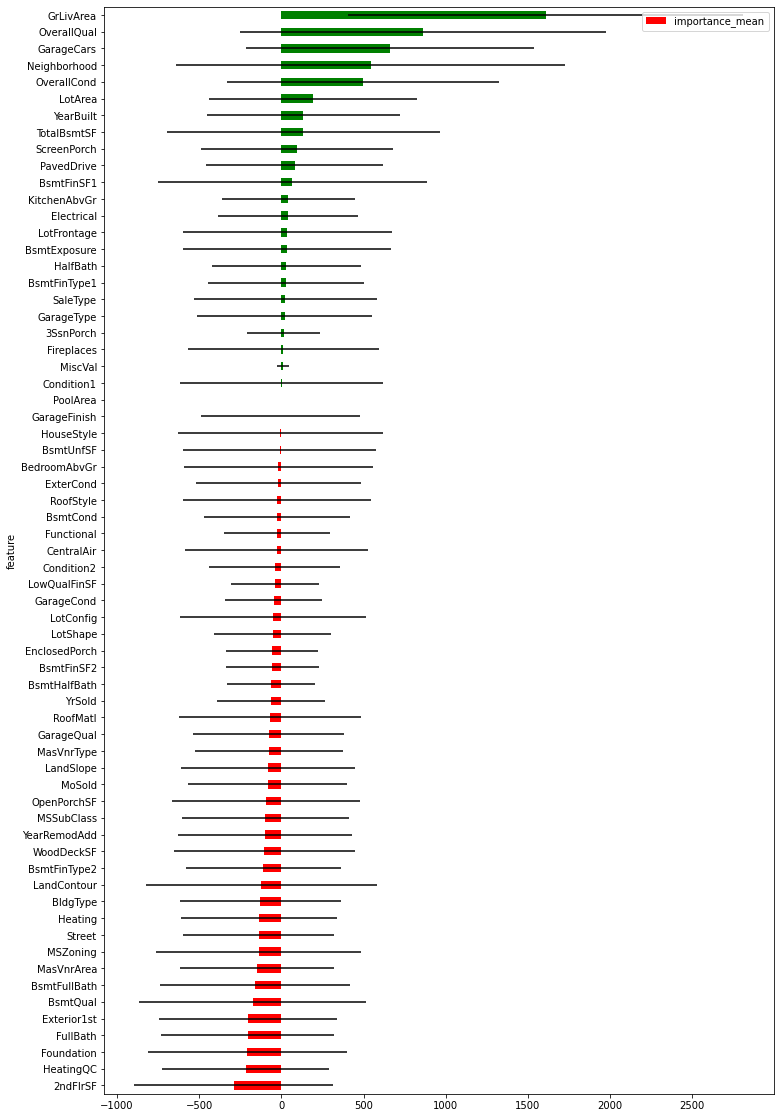

In [59]:
# define the binary target and the features
dataset = Dataset(df=df, target="SalePrice", features=[col for col in df.columns if col != "SalePrice"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=kfold, scoring="neg_mean_absolute_error")

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20))

In [60]:
importance_df

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,val_imp_7,val_imp_8,val_imp_9,val_imp_10,val_imp_11,val_imp_12,val_imp_13,val_imp_14,val_imp_15,val_imp_16,val_imp_17,val_imp_18,val_imp_19
61,GrLivArea,1607.6527,1202.6724,1956.2827,621.2507,1566.9059,1965.0080,201.7183,3009.9728,2019.9391,1587.6891,1266.2519,3224.5704,4250.0178,2421.6385,1126.2012,-72.8124,483.0249,2595.4278,-130.2965,-121.1122,1241.1714,2940.2055
62,OverallQual,861.9635,1112.3092,403.8213,1524.7089,2377.3803,-370.9749,466.9541,469.8032,468.6035,-597.0814,351.3472,1442.2501,1098.9405,2459.5126,1697.4356,-444.3319,-1184.7488,329.2323,1046.3299,2435.9995,3029.3363,234.7518
18,GarageCars,660.1144,877.3213,834.4156,-987.2270,1109.6079,-798.7382,1758.2053,271.9986,-316.0229,228.3828,-53.8433,240.6238,195.4894,165.7819,836.9106,1913.3451,801.0297,1642.1276,65.4959,1539.5901,1891.3909,1863.7253
26,Neighborhood,543.1627,1183.9224,2139.1259,568.6142,1142.4063,-180.7988,3569.1397,-420.5991,1218.0720,-593.0984,545.6939,1298.8624,1096.1301,-175.8603,528.8301,-741.5646,723.4857,294.0438,-640.6832,2427.2334,-729.5727,-1206.2061
47,OverallCond,497.2149,830.3907,-7.4518,824.0228,-354.4013,-1138.2798,2628.8872,1069.3402,205.8636,-772.5938,105.0419,-235.0145,1451.1471,600.0350,871.9991,955.1092,1139.6494,725.7285,507.6953,404.8077,1197.5947,-234.8831
52,LotArea,193.0059,631.1360,277.2650,-625.8379,-382.6120,-897.1799,1148.0607,381.5835,716.1976,-676.9611,-10.1894,-622.3659,802.1737,228.2196,659.3773,434.3600,-339.2042,444.2125,642.2442,682.5797,1353.9399,-355.7451
15,YearBuilt,134.4274,586.2080,853.6597,734.6610,-465.2131,-788.7277,1343.7902,191.9228,-1256.0457,323.9828,177.6801,-647.7268,332.8852,-103.4633,421.3368,629.4688,298.6225,524.4176,40.2004,133.8874,-215.8477,159.0578
34,TotalBsmtSF,134.3094,829.6180,-204.4904,-413.6822,-127.1830,-1005.8852,899.6454,539.5380,1002.6461,-941.6293,237.9664,548.3879,773.5084,-541.0719,1512.6319,-784.7849,1963.4494,82.4140,-520.8804,-72.4397,-1016.2927,754.3406
22,ScreenPorch,93.0585,584.9191,1013.5667,-385.2080,-315.3558,583.7787,65.2230,537.1300,-360.1949,-178.9460,-19.8203,-826.4045,395.0638,-212.2404,843.2511,-223.6945,-157.0703,-291.3981,245.6275,398.6606,1534.3988,-785.1970
51,PavedDrive,79.9730,538.4403,1335.7501,-257.8434,-164.2667,1047.7056,285.6438,268.8224,-476.5073,-357.2761,80.5006,-697.9922,513.9830,71.9833,292.9272,-207.6329,-363.0785,-8.8290,-554.0415,805.5154,472.9485,-488.8515


In [61]:
importance_df.feature.tolist()

['GrLivArea',
 'OverallQual',
 'GarageCars',
 'Neighborhood',
 'OverallCond',
 'LotArea',
 'YearBuilt',
 'TotalBsmtSF',
 'ScreenPorch',
 'PavedDrive',
 'BsmtFinSF1',
 'KitchenAbvGr',
 'Electrical',
 'LotFrontage',
 'BsmtExposure',
 'HalfBath',
 'BsmtFinType1',
 'SaleType',
 'GarageType',
 '3SsnPorch',
 'Fireplaces',
 'MiscVal',
 'Condition1',
 'PoolArea',
 'GarageFinish',
 'HouseStyle',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ExterCond',
 'RoofStyle',
 'BsmtCond',
 'Functional',
 'CentralAir',
 'Condition2',
 'LowQualFinSF',
 'GarageCond',
 'LotConfig',
 'LotShape',
 'EnclosedPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'YrSold',
 'RoofMatl',
 'GarageQual',
 'MasVnrType',
 'LandSlope',
 'MoSold',
 'OpenPorchSF',
 'MSSubClass',
 'YearRemodAdd',
 'WoodDeckSF',
 'BsmtFinType2',
 'LandContour',
 'BldgType',
 'Heating',
 'Street',
 'MSZoning',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtQual',
 'Exterior1st',
 'FullBath',
 'Foundation',
 'HeatingQC',
 '2ndFlrSF']

In [62]:
finales=['GrLivArea',
 'OverallQual',
 'GarageCars',
 'Neighborhood',
 'OverallCond',
 'LotArea',
 'TotalBsmtSF',
 'YearBuilt',
 'ScreenPorch',
 'PavedDrive',
 'BsmtFinSF1',
 'KitchenAbvGr',
 'Electrical',
 'LotFrontage',
 'BsmtExposure',
 'HalfBath',
 'BsmtFinType1',
 'SaleType',
 'GarageType',
 '3SsnPorch',
 'MiscVal',
 'Fireplaces']

In [63]:
X_train_f=X_train[finales]

In [64]:
X_test_f=X_test[finales]

In [65]:
X_test_f

,GrLivArea,OverallQual,GarageCars,Neighborhood,OverallCond,LotArea,TotalBsmtSF,YearBuilt,ScreenPorch,PavedDrive,BsmtFinSF1,KitchenAbvGr,Electrical,LotFrontage,BsmtExposure,HalfBath,BsmtFinType1,SaleType,GarageType,3SsnPorch,MiscVal,Fireplaces
0,-0.8776,-0.5000,-1.0000,146002.2752,1.0000,0.5295,-0.2179,-0.2609,120.0000,186429.8629,0.1186,0.0000,186806.2292,0.5789,163456.8712,0.0000,147143.2179,173407.7667,194397.3027,0.0000,0.0000,-1.0000
1,-0.2086,0.0000,-1.0000,146002.2752,1.0000,1.1829,0.6716,-0.3261,0.0000,186429.8629,0.7575,0.0000,186806.2292,0.6316,163456.8712,1.0000,161660.6163,173407.7667,194397.3027,0.0000,12500.0000,-1.0000
2,0.2549,-0.5000,0.0000,192705.3399,0.0000,1.0750,-0.1264,0.5217,0.0000,186429.8629,0.5721,0.0000,186806.2292,0.2632,163456.8712,1.0000,235283.6663,173407.7667,194397.3027,0.0000,0.0000,0.0000
3,0.2163,0.0000,0.0000,192705.3399,1.0000,0.1234,-0.1303,0.5435,0.0000,186429.8629,0.3068,0.0000,186806.2292,0.4737,163456.8712,1.0000,235283.6663,173407.7667,194397.3027,0.0000,0.0000,0.0000
4,-0.2843,1.0000,0.0000,305515.2383,0.0000,-1.1051,0.5741,0.4130,144.0000,186429.8629,-0.1692,0.0000,186806.2292,-1.3684,163456.8712,0.0000,161660.6163,173407.7667,194397.3027,0.0000,0.0000,-1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.5747,-1.0000,-2.0000,103151.1775,2.0000,-1.8633,-0.8866,-0.0652,0.0000,186429.8629,-0.5384,0.0000,186806.2292,-2.5263,163456.8712,1.0000,165552.1927,173407.7667,194397.3027,0.0000,0.0000,-1.0000
1455,-0.5747,-1.0000,-1.0000,103151.1775,0.0000,-1.8736,-0.8866,-0.0652,0.0000,186429.8629,-0.1846,0.0000,186806.2292,-2.5263,163456.8712,1.0000,147143.2179,173407.7667,117058.0196,0.0000,0.0000,-1.0000
1456,-0.3708,-0.5000,0.0000,156763.1439,2.0000,2.5992,0.4627,-0.2826,0.0000,186429.8629,1.1801,0.0000,186806.2292,4.7895,163456.8712,0.0000,161660.6163,173407.7667,134211.8588,0.0000,0.0000,0.0000
1457,-0.7632,-0.5000,-2.0000,156763.1439,0.0000,0.2378,-0.1582,0.4130,0.0000,186429.8629,-0.0653,0.0000,186806.2292,-0.3684,206527.5549,0.0000,235283.6663,173407.7667,194397.3027,0.0000,700.0000,-1.0000


In [66]:
X_train_f

,GrLivArea,OverallQual,GarageCars,Neighborhood,OverallCond,LotArea,TotalBsmtSF,YearBuilt,ScreenPorch,PavedDrive,BsmtFinSF1,KitchenAbvGr,Electrical,LotFrontage,BsmtExposure,HalfBath,BsmtFinType1,SaleType,GarageType,3SsnPorch,MiscVal,Fireplaces
0,0.3801,0.5000,0.0000,180921.1959,0.0000,-0.2541,-0.2697,0.6522,0.0000,180921.1959,0.4528,0.0000,180921.1959,-0.2105,180921.1959,1.0000,180921.1959,180921.1959,180921.1959,0.0000,0.0000,-1.0000
1,-0.3121,0.0000,0.0000,180921.1959,3.0000,0.0300,0.5383,0.0652,0.0000,194710.5979,0.8347,0.0000,194710.5979,0.5789,180921.1959,0.0000,180921.1959,194710.5979,194710.5979,0.0000,0.0000,0.0000
2,0.4975,0.5000,0.0000,194710.5979,0.0000,0.4376,-0.1423,0.6087,0.0000,190307.0653,0.1439,0.0000,190307.0653,-0.0526,180921.1959,1.0000,194710.5979,190307.0653,190307.0653,0.0000,0.0000,0.0000
3,0.3909,0.5000,1.0000,180921.1959,0.0000,0.0177,-0.4687,-1.2609,0.0000,198605.2990,-0.2352,0.0000,198605.2990,-0.4737,194710.5979,0.0000,181210.5979,198605.2990,180921.1959,0.0000,0.0000,0.0000
4,1.1340,1.0000,1.0000,180921.1959,0.0000,1.1812,0.3055,0.5870,0.0000,186884.2392,0.3812,0.0000,186884.2392,0.7895,180921.1959,1.0000,204307.0653,186884.2392,198605.2990,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2827,0.0000,0.0000,192929.4582,0.0000,-0.3857,-0.0766,0.5652,0.0000,186423.1446,-0.5384,0.0000,186767.3590,-0.3684,163309.9354,1.0000,165531.9619,173349.1078,194429.8914,0.0000,0.0000,0.0000
1456,0.9409,0.0000,0.0000,188651.7287,1.0000,0.9132,1.0955,0.1087,0.0000,186414.6007,0.5707,0.0000,186758.5313,0.8421,163321.7555,0.0000,161440.8918,173350.4139,194409.3958,0.0000,0.0000,1.0000
1457,1.3534,0.5000,-1.0000,208946.7097,4.0000,-0.1078,0.3194,-0.6957,0.0000,186432.2281,-0.1523,0.0000,186775.9537,-0.1579,163368.9052,0.0000,235432.2091,173379.3859,194425.8242,0.0000,2500.0000,1.0000
1458,-0.5964,-0.5000,-1.0000,146019.5075,1.0000,0.0589,0.1721,-0.5000,0.0000,186492.0248,-0.4696,0.0000,122609.6191,-0.0526,193129.9754,0.0000,235506.5340,173452.9409,194501.6918,0.0000,0.0000,-1.0000


In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import xgboost as xgb

In [68]:
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scoring = {'AUC': 'roc_auc', 'NLL': 'neg_log_loss'}

param_grid= {

#     "selectkbest__k": list(range(5,10,1)),

    "max_depth":[3,4,5,6],

    "learning_rate":[0.05,0.1,0.3],

    

    "n_estimators": [1000],

    "scale_pos_weight": [1,2],

    "min_child_weight": [0,1,3,5],

    "gamma": [0,0.25,1.0],

    "reg_lambda":[0,1.0,10.0]

   

    

}

 

 

 

# kbest = SelectKBest()### modelo con ROC_AUC 10 variables

model=xgb.XGBRegressor(seed=42)

 

 

sh4=HalvingGridSearchCV(model, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=kfold,  verbose=True,

                        min_resources="exhaust", factor= 4 )

sh4.fit(X_train_f, y_train)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 10
max_resources_: 1460
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 864
n_resources: 10
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


----------
iter: 1
n_candidates: 216
n_resources: 40
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


----------
iter: 2
n_candidates: 54
n_resources: 160
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


----------
iter: 3
n_candidates: 14
n_resources: 640
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           intera...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                       

In [69]:
print("Best: %f using %s" % (sh4.best_score_, sh4.best_params_))

Best: -19311.619543 using {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0, 'n_estimators': 1000, 'reg_lambda': 1.0, 'scale_pos_weight': 1}


In [70]:
sh4.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=0,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1.0, ...)

In [71]:
sh4_best = sh4.best_estimator_

In [72]:
Y_pred = sh4_best.predict(X_test_f)

In [73]:
Y_pred

array([127933.5 , 158095.58, 192314.78, ..., 189139.81, 125440.74,
       222893.5 ], dtype=float32)

In [74]:
submission = pd.DataFrame({
        "Id": identidad,
        "SalePrice": Y_pred
    })
submission.to_csv('submission_2.csv', index=False)

In [75]:
from joblib import dump , load 
estimator = sh4.best_estimator_
dump(estimator, "your-model_1.joblib")
estimator = load("your-model_1.joblib")

In [76]:
estimator

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=0,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1.0, ...)